In [1]:
import pandas as pd

In [2]:
grp = pd.read_csv('kmeans_group.csv')

In [3]:
suicide = pd.read_csv('kmeans_suicide.csv')

In [4]:
cell = pd.read_excel('cell_count.xlsx')

In [5]:
grp.head()

,Unnamed: 0,DIRA1_HUMAN,PRS8_HUMAN,CN166_HUMAN,MA2A1_HUMAN,HPT_HUMAN,HS71L_HUMAN,VGF_HUMAN,RB6I2_HUMAN,patient,group,kmeans,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,0,12.057127,12.376041,10.169992,11.657736,12.560511,13.794041,10.120543,10.763291,113,1,2,NaN,NaN,NaN,NaN
1,1,11.502411,12.270754,10.083468,11.044040,12.178349,13.525363,9.997073,11.310302,118,0,0,NaN,NaN,NaN,NaN
2,2,12.125484,12.582711,9.903765,11.374073,12.473881,14.093406,10.253357,10.394984,178,1,1,NaN,NaN,NaN,NaN
3,3,11.984990,12.207590,10.075545,11.320502,12.084332,13.592409,9.657683,11.224291,190,0,0,NaN,Legend,NaN,NaN
4,4,11.723921,12.152663,9.931062,11.126727,12.284083,13.732836,10.526246,11.510833,210,0,0,NaN,group a,0.0,MDD*SSRI


In [8]:
grp = grp.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15'],axis=1)

In [9]:
suicide.head()

,Unnamed: 0,DIRA1_HUMAN,PRS8_HUMAN,RB6I2_HUMAN,ATD3A_HUMAN,MA2A1_HUMAN,ENPL_HUMAN,patient_id,suicide,kmeans,truth
0,0,12.057127,12.376041,10.763291,9.779869,11.657736,13.402372,113,Non-Suic,0,0
1,1,11.502411,12.270754,11.310302,9.586055,11.044040,12.962433,118,Suicide,1,1
2,2,12.125484,12.582711,10.394984,9.803057,11.374073,13.234141,178,Non-Suic,0,0
3,3,11.984990,12.207590,11.224291,9.528297,11.320502,13.049346,190,Suicide,1,1
4,4,11.723921,12.152663,11.510833,9.837450,11.126727,13.067287,210,Suicide,1,1


In [10]:
cell.head()

,ID,GROUP,SEX,AGE,SUICIDE,MODE OF DEATH,TOXICOLOGY,PMI,BRAIN PH,GAS,...,DCX_AntDG,Nissl_AntGlia#,PSANCAM_AntAllCell,PSAAntBipol#,PSAAntPyram#,PSAAntImm#,VssANTDG#VesXmm³,VssANTArea_um2,VssLGHTAvgANT_um,VssANT#NodesXVes
0,1043,Control,F,14,NonSuicide,Traffic Accident-Pedestrian (Accident),NONE,17.0,Pending,100,...,7711.21,1294296.0,6371.0,5172.0,50.0,1149.0,14226.0,598074.1182,4944.0600,0.2919
1,1018,MDD,M,26,Suicide,Fall From Height (Suicide),NONE,4.0,Pending,61,...,7510.43,1642173.0,6361.0,5172.0,40.0,1149.0,NaN,NaN,NaN,NaN
2,1005,MDD,F,57,NonSuicide,Hemorrhagic Pancreatitis (Natural),NONE,9.0,6,61,...,5302.50,1326092.0,NaN,5172.0,NaN,1149.0,9455.0,330686.1127,1894.7250,0.2594
3,893,MDD,F,71,Suicide,Drowning (Suicide),NONE,7.0,6.3,30,...,1662.85,998784.0,1756.0,858.0,40.0,858.0,NaN,NaN,NaN,NaN
4,892,Control,F,50,NonSuicide,Peritonitis (Natural),NONE,22.0,6.1,70,...,9575.61,2793457.0,NaN,3441.0,607.0,1215.0,9293.0,266194.0318,2080.7333,0.1730


In [21]:
grp = grp.rename(columns={'patient':'patient_id'
})

In [15]:
demo = cell[['patient_id','SEX','AGE']]

In [18]:
dem_suicide = pd.merge(suicide, demo, on='patient_id')

In [19]:
dem_suicide.to_csv('dem_suicide.csv')

In [22]:
grp_suicide = pd.merge(grp, demo, on='patient_id')
grp_suicide.to_csv('grp_suicide.csv')

In [23]:
cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 30 columns):
patient_id                   36 non-null int64
GROUP                        36 non-null object
SEX                          36 non-null object
AGE                          36 non-null int64
SUICIDE                      36 non-null object
MODE OF DEATH                36 non-null object
TOXICOLOGY                   36 non-null object
PMI                          36 non-null float64
BRAIN PH                     36 non-null object
GAS                          36 non-null int64
Duration of  MDD             24 non-null object
Age at MDD Onset             24 non-null object
N. of Depressive Episodes    24 non-null float64
ETHNICITY                    36 non-null object
SMOKER                       36 non-null object
ID.1                         36 non-null int64
AntDGVol_mm3                 36 non-null float64
GNAnt#                       34 non-null float64
NestinAnt#                   36 n

In [35]:
cell_suicide = cell.drop(['GROUP',
                          'AGE',
                          'MODE OF DEATH',
                          'TOXICOLOGY',
                          'PMI',
                         'BRAIN PH',
                         'GAS',
                         'Duration of  MDD',
                         'Age at MDD Onset',
                         'N. of Depressive Episodes',
                         'ETHNICITY',
                         'SMOKER',
                         'ID.1'], axis=1)

In [45]:
cell_grp = cell.drop([
                          'AGE',
                          'MODE OF DEATH',
                          'TOXICOLOGY',
                          'PMI',
                         'BRAIN PH',
                         'GAS',
                         'Duration of  MDD',
                         'Age at MDD Onset',
                         'N. of Depressive Episodes',
                         'ETHNICITY',
                         'SMOKER',
                         'ID.1',
                     'SEX'], axis=1)

In [36]:
cell_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
patient_id            36 non-null int64
SEX                   36 non-null object
SUICIDE               36 non-null object
AntDGVol_mm3          36 non-null float64
GNAnt#                34 non-null float64
NestinAnt#            36 non-null int64
Ki67Head#             32 non-null float64
DCX_AntDG             26 non-null float64
Nissl_AntGlia#        33 non-null float64
PSANCAM_AntAllCell    27 non-null float64
PSAAntBipol#          33 non-null float64
PSAAntPyram#          33 non-null float64
PSAAntImm#            32 non-null float64
VssANTDG#VesXmm³      30 non-null float64
VssANTArea_um2        30 non-null float64
VssLGHTAvgANT_um      25 non-null float64
VssANT#NodesXVes      28 non-null float64
dtypes: float64(13), int64(2), object(2)
memory usage: 4.9+ KB


In [37]:
cell_suicide = cell_suicide.drop(['SEX'], axis=1)

In [40]:
from scipy import stats

pvalues = []
for col in cell_suicide.columns:

    if (col != 'patient_id') & (col != 'SUICIDE'):
        p = stats.mannwhitneyu(cell_suicide[cell_suicide['SUICIDE']=='Suicide'][col],
                           cell_suicide[cell_suicide['SUICIDE']=='NonSuicide'][col])[1]
        
        pvalues.append([col,p])

pvalues = pd.DataFrame(pvalues)
pvalues = pvalues.rename(columns={0:'feature',1:'pvalues'})
pvalues

,feature,pvalues
0,AntDGVol_mm3,0.437052
1,GNAnt#,0.437056
2,NestinAnt#,0.242693
3,Ki67Head#,0.257842
4,DCX_AntDG,0.412224
5,Nissl_AntGlia#,0.043509
6,PSANCAM_AntAllCell,0.120435
7,PSAAntBipol#,0.294763
8,PSAAntPyram#,0.424379
9,PSAAntImm#,0.363472


In [41]:
pvalues[pvalues['pvalues']<0.05]

,feature,pvalues
5,Nissl_AntGlia#,0.043509


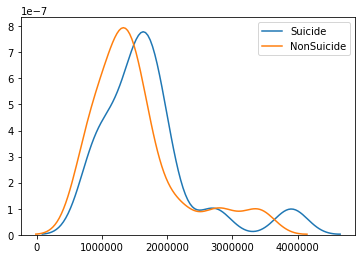

In [42]:
sns.kdeplot(cell_suicide[(cell_suicide['SUICIDE']=='Suicide')]['Nissl_AntGlia#'],label='Suicide')
sns.kdeplot(cell_suicide[(cell_suicide['SUICIDE']=='NonSuicide')]['Nissl_AntGlia#'],label='NonSuicide')

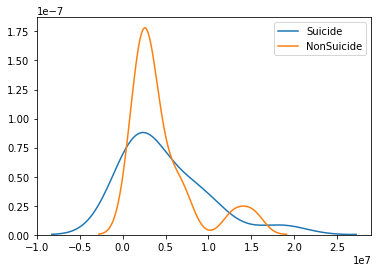

In [43]:
sns.kdeplot(cell_suicide[(cell_suicide['SUICIDE']=='Suicide')]['GNAnt#'],label='Suicide')
sns.kdeplot(cell_suicide[(cell_suicide['SUICIDE']=='NonSuicide')]['GNAnt#'],label='NonSuicide')

In [50]:
from scipy.stats import kruskal

grp_c = cell_grp[cell_grp['GROUP']=='Control']
grp_mdd = cell_grp[cell_grp['GROUP']=='MDD']
grp_ssri = cell_grp[cell_grp['GROUP']=='MDD*ADT']

In [55]:
cols = list(grp_c.columns)
cols.remove('patient_id')
cols.remove('GROUP')
cols.remove('SUICIDE')
def conduct_tests(group1, group2, group3):
    results = []
    for col in cols:
        p_val = kruskal(group1[col], group2[col],group3[col])[1]
        if p_val < 0.05:
            results.append([col,p_val])
            
    return pd.DataFrame(results)
        
results = conduct_tests(grp_c, grp_mdd, grp_ssri)

In [56]:
results

,0,1
0,NestinAnt#,0.000197


In [57]:
0.05/14

0.0035714285714285718

In [58]:
0.000197*14

0.002758

## Check if these are correlated with age in each group 